In [ ]:
numerical_features = data.select_dtypes(include=["int64", "float64"]).columns.to_list()
print(numerical_features)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [ ]:
import pandas as pd
import numpy as np
import seaborn as snr
data=pd.read_csv("/content/Housing (1).csv")
data.head()
print(data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [ ]:
pd.isnull(data).sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    False  False     False      False    False     False      False   
1    False  False     False      False    False     False      False   
2    False  False     False      False    False     False      False   
3    False  False     False      False    False     False      False   
4    False  False     False      False    False     False      False   
..     ...    ...       ...        ...      ...       ...        ...   
540  False  False     False      False    False     False      False   
541  False  False     False      False    False     False      False   
542  False  False     False      False    False     False      False   
543  False  False     False      False    False     False      False   
544  False  False     False      False    False     False      False   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0  

In [ ]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data['mainroad']=data['mainroad'].apply({'yes':1,'no':0}.get)

In [ ]:
data['basement']=data['basement'].apply({'yes':1,'no':0}.get)

In [ ]:
data['hotwaterheating']=data['hotwaterheating'].apply({'yes':1,'no':0}.get)

In [ ]:
data['airconditioning']=data['airconditioning'].apply({'yes':1,'no':0}.get)

In [ ]:
data['prefarea']=data['prefarea'].apply({'yes':1,'no':0}.get)

In [ ]:
data['guestroom']=data['guestroom'].apply({'yes':1,'no':0}.get)

In [ ]:
data['furnishingstatus']=data['furnishingstatus'].apply({'furnished':1,'semi-furnished':0,'unfurnished':3}.get)

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [ ]:
x=data[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','furnishingstatus']]

In [ ]:
y=data['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [ ]:
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
prediction=reg.predict(x_test)

In [ ]:
print(prediction)

[3988596.47521099 4260454.68738496 2922355.04719803 7754885.84944877
 2916407.58476946 7646469.23729471 3196045.75339638 5564343.2921008
 4995341.06644092 3258046.08495746 6457606.31357695 4437421.30084565
 4233162.71794775 7134643.12133732 2633145.38199224 3770345.23012064
 2861393.5573051  3332729.95476999 5561825.38300241 6888291.80090327
 5307180.71834295 5244376.94626047 7359414.76586232 4496768.14423475
 3518438.50401179 6017211.50788375 4014684.00091433 4279466.51392428
 6957011.17969546 5209523.80231511 4124783.07533335 3716431.18007002
 4444069.25936946 4683919.14943432 4322735.89239046 5200662.56564108
 5082779.10068743 2826805.72684075 6683427.06131293 4587450.72062272
 3988944.8251293  3086498.54061981 3333967.31710746 5474233.41370823
 5513315.79462816 4830805.89985005 4737336.53756294 2596725.44294757
 3305676.30395975 3266989.38418066 3985625.77730331 5893003.86227914
 6690031.41512124 4985590.40827719 3880788.35023325 6916132.18065144
 6408257.91904065 6918331.76054649 

In [ ]:
reg.score(x,y)

0.5921908859782612

In [ ]:
np.median(data.price)

4340000.0

In [ ]:
round(100*(data.bedrooms.isnull().sum(axis=0)/data.shape[0]),2)

0.0

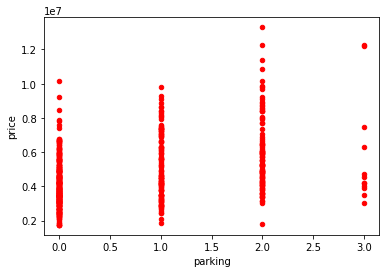

In [ ]:
data.plot.scatter(x='parking',y="price",c='red')

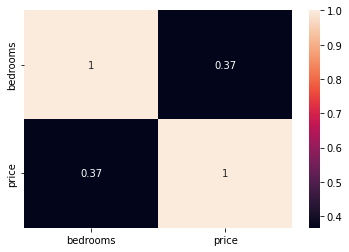

In [ ]:
snr.heatmap(data[['bedrooms','price']].corr(),annot=True)

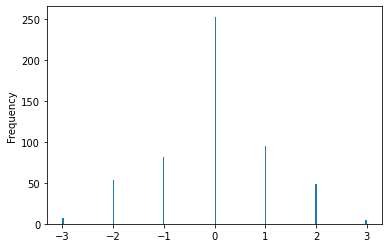

In [ ]:
data['parking'].diff().plot(kind='hist',bins=200)

(3430000.0, 4340000.0)

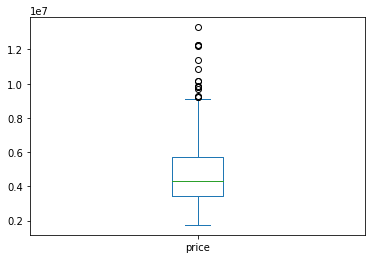

In [ ]:
data['price'].plot(kind="box")
np.quantile(data['price'],0.25),np.quantile(data.price,0.50)

1650
16200


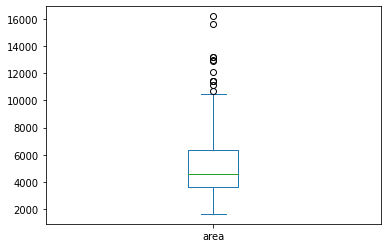

In [ ]:
data['area'].plot(kind='box')
x=np.min(data["area"])
y=np.max(data.area)
print(x)
print(y)